# Alkım Ege Akarsu | 21901461 | GE 461 | Project 4: Telehealth - Fall Detection

## Import Modules

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay

SEED = 0

## Load Dataset

In [2]:
# Get dataset path
dataset_path = Path().resolve().joinpath("dataset.csv")
# Load dataset into DataFrame
dataset = pd.read_csv(dataset_path, sep=",", header=None)

# Delete first column (indices)
dataset.drop(dataset.columns[0], axis=1, inplace=True)
# Convert NF, F to 0, 1 (labels)
dataset.iloc[:, 0] = dataset.iloc[:, 0].replace({"NF": 0, "F": 1}).infer_objects(copy=False)

# Check for NaN values
if dataset.isnull().values.any() == True:
    print("----- NaN values found in dataset! -----\n")
else:
    print("----- No NaN values found in dataset! -----\n")

# Convert DataFrame to ndarray
dataset = dataset.to_numpy()

# Separate X and y (labels in column index 0)
X = dataset[:, 1:]
y = dataset[:, 0]

# Get the index of the outlier
outlier_index_row = (np.argmax(X) / X.shape[1]).astype(np.uint16)
# Remove the outlier
X_no_outlier = np.delete(X, outlier_index_row, axis=0)
y_no_outlier = np.delete(y, outlier_index_row)

# Get number of data points belonging to each class
num_1 = np.count_nonzero(y == 1)
num_0 = y.shape[0] - num_1
print(f"Number of 'No Fall' data points: {num_0}\n"
      f"Number of 'Fall' data points: {num_1}\n")

----- No NaN values found in dataset! -----

Number of 'No Fall' data points: 253
Number of 'Fall' data points: 313



/tmp/ipykernel_8896/766205689.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.iloc[:, 0] = dataset.iloc[:, 0].replace({"NF": 0, "F": 1}).infer_objects(copy=False)


## Part A

### Outlier

Variance explained by the first two principal components:
PC1: 75.3%
PC2: 8.5%
PC1 + PC2: 83.8%



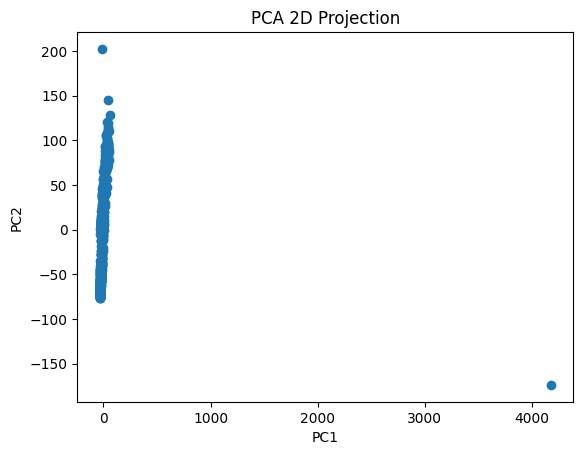

Variance explained by the first two principal components (outlier removed):
PC1: 36.9%
PC2: 17.2%
PC1 + PC2: 54.1%



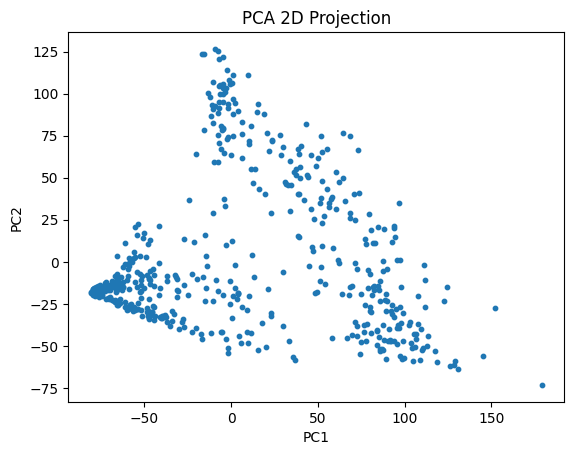

In [3]:
# WITH THE OUTLIER
# Get the PCA object
pca = PCA(n_components=2, random_state=SEED)
# Fit and transform
X_pca = pca.fit_transform(X)
# Get variance captured
var_exp = pca.explained_variance_ratio_
print(f"Variance explained by the first two principal components:\n"
      f"PC1: {var_exp[0] * 100:.1f}%\n"
      f"PC2: {var_exp[1] * 100:.1f}%\n"
      f"PC1 + PC2: {np.sum(var_exp) * 100:.1f}%\n")

# Visualize the results
plt.figure()
plt.title("PCA 2D Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

# WITHOUT THE OUTLIER
# Get the PCA object
pca = PCA(n_components=2, random_state=SEED)
# Fit and transform
X_pca = pca.fit_transform(X_no_outlier)
# Get variance captured
var_exp = pca.explained_variance_ratio_
print(f"Variance explained by the first two principal components (outlier removed):\n"
      f"PC1: {var_exp[0] * 100:.1f}%\n"
      f"PC2: {var_exp[1] * 100:.1f}%\n"
      f"PC1 + PC2: {np.sum(var_exp) * 100:.1f}%\n")

# Visualize the results
plt.figure()
plt.title("PCA 2D Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10)
plt.show()

# Remove outlier from the original dataset
X = X_no_outlier
y = y_no_outlier

### K-Means Clustering

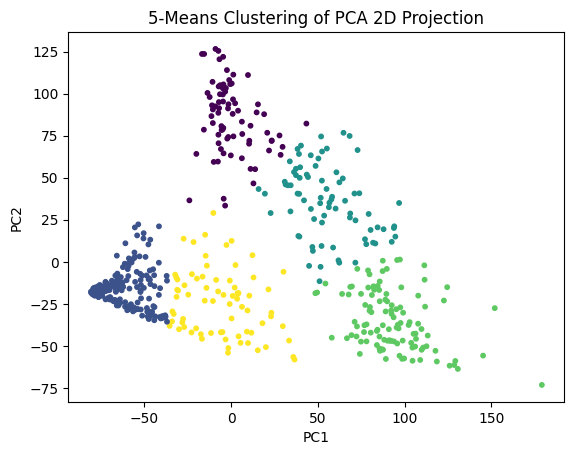

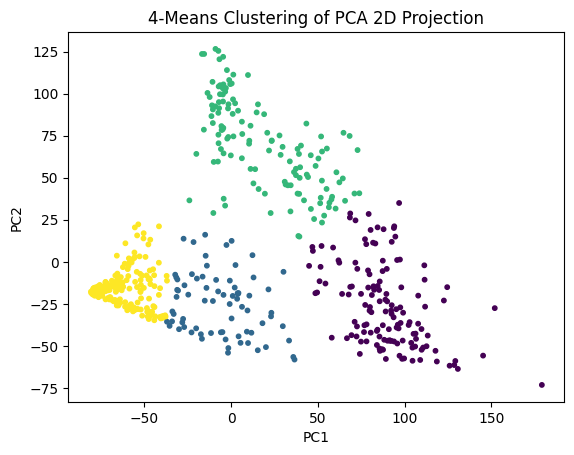

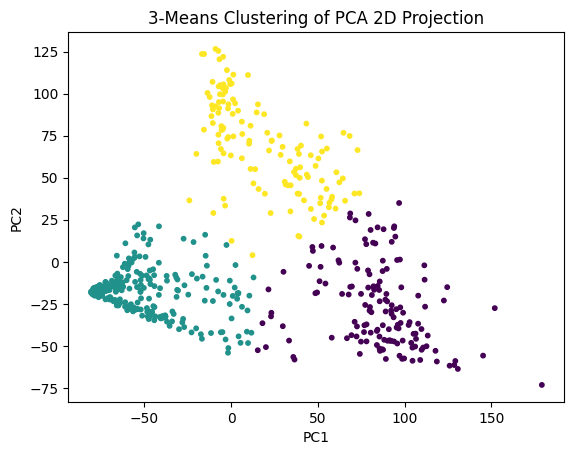

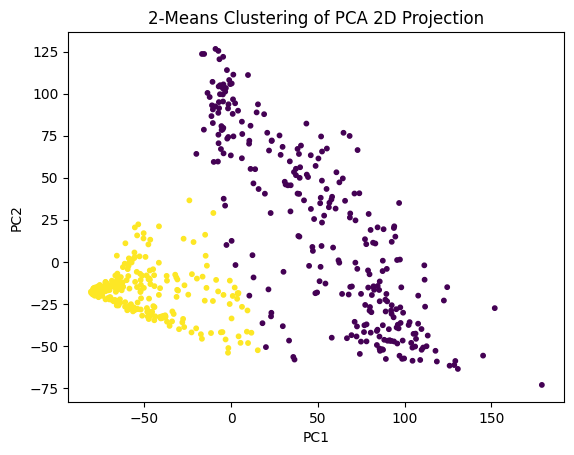

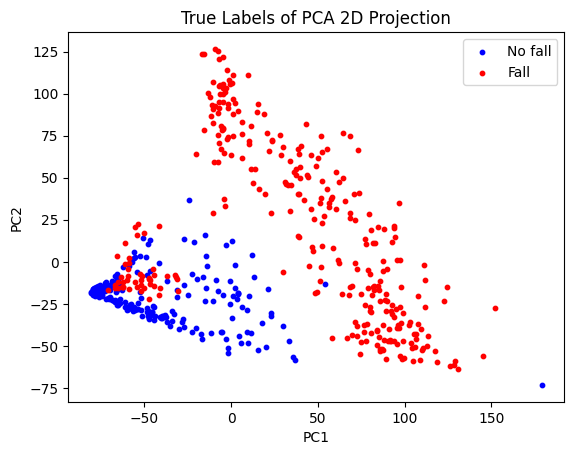

Overlap ratio between true labels and clustering labels: 88.5%


In [4]:
# K = 5
# Get the KMeans object
kmeans = KMeans(n_clusters=5, init="random", n_init=20, max_iter=np.uint32(1e4), random_state=SEED)
# Run K-Means on the 2D data
X_kmeans = kmeans.fit_transform(X_pca)
# Get labels
y_kmeans = kmeans.labels_

# Visualize the results
plt.figure()
plt.title("5-Means Clustering of PCA 2D Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, c=y_kmeans)
plt.show()


# K = 4
# Get the KMeans object
kmeans = KMeans(n_clusters=4, init="random", n_init=20, max_iter=np.uint32(1e4), random_state=SEED)
# Run K-Means on the 2D data
X_kmeans = kmeans.fit_transform(X_pca)
# Get labels
y_kmeans = kmeans.labels_

# Visualize the results
plt.figure()
plt.title("4-Means Clustering of PCA 2D Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, c=y_kmeans)
plt.show()


# K = 3
# Get the KMeans object
kmeans = KMeans(n_clusters=3, init="random", n_init=20, max_iter=np.uint32(1e4), random_state=SEED)
# Run K-Means on the 2D data
X_kmeans = kmeans.fit_transform(X_pca)
# Get labels
y_kmeans = kmeans.labels_

# Visualize the results
plt.figure()
plt.title("3-Means Clustering of PCA 2D Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, c=y_kmeans)
plt.show()


# K = 2
# Get the KMeans object
kmeans = KMeans(n_clusters=2, init="random", n_init=20, max_iter=np.uint32(1e4), random_state=SEED)
# Run K-Means on the 2D data
X_kmeans = kmeans.fit_transform(X_pca)
# Get labels
y_kmeans = kmeans.labels_

# Visualize the results
plt.figure()
plt.title("2-Means Clustering of PCA 2D Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, c=y_kmeans)
plt.show()

# Visualize true labels
plt.figure()
plt.title("True Labels of PCA 2D Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
# Create a color map for the two classes
colors = ['blue', 'red']
labels = ['No fall', 'Fall']
# Scatter plot with custom color map
for i in range(len(colors)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], s=10, c=colors[i], label=labels[i])
plt.legend(loc="upper right")
plt.show()


# Overlap calculation
# Initilize counter for counting overlap
counter = 0
# Loop over the labels
for i in range(y.shape[0]):
    # Increment counter if labels are the same
    if y_kmeans[i] == y[i]:
        counter += 1

# Get ratio
ratio = counter / y.shape[0]
# Get inverse of counter if less than 0.5
if ratio < 0.5:
    ratio = 1 - ratio

# Print the result
print(f"Overlap ratio between true labels and clustering labels: {ratio * 100:.1f}%")

## Part B

### Preprocessing

In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)

# Get standardizer object
scaler = StandardScaler()
# Get mean and std of the TRAINING SET
scaler.fit(X_train)
# Standardize all sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Convert y to integer data types
y_train = np.uint8(y_train)
y_test = np.uint8(y_test)

### Hyperparameter Optimization With Cross Validation

#### Support Vector Machine

Best parameters: {'C': 0.1, 'kernel': 'linear', 'random_state': 0}
Best score: 0.9977777777777778


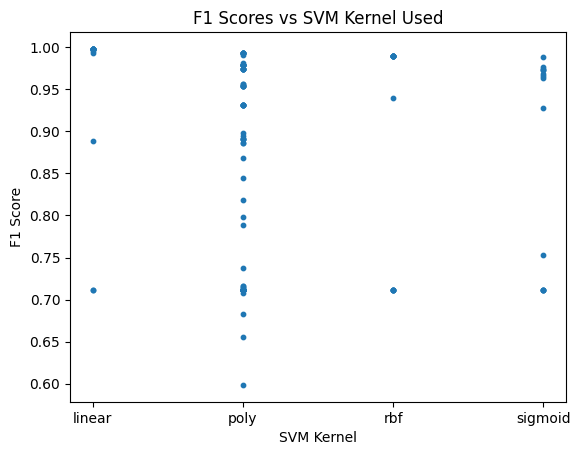

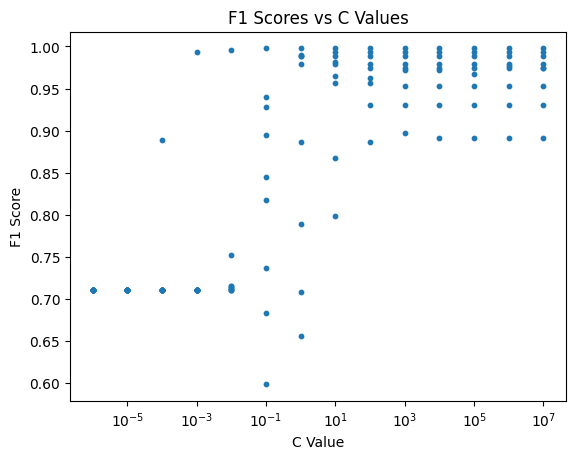

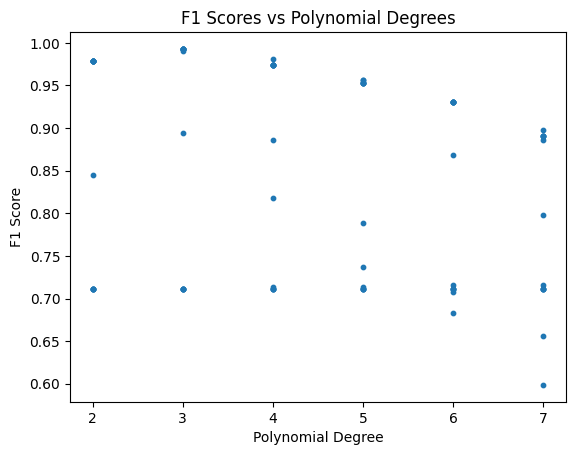

In [6]:
# Prepare hyperparameter grid
param_grid = [
    {"C": np.logspace(-6, 7, 14), "kernel": ["linear"], "random_state": [SEED]},
    {"C": np.logspace(-6, 7, 14), "kernel": ["poly"], "degree": list(range(2, 8)), "random_state": [SEED]},
    {"C": np.logspace(-6, 7, 14), "kernel": ["rbf"], "random_state": [SEED]},
    {"C": np.logspace(-6, 7, 14), "kernel": ["sigmoid"], "random_state": [SEED]},
]

# Get model object
svm = SVC()

# Get grid search object
best_svm = GridSearchCV(estimator=svm, param_grid=param_grid, scoring="f1", cv=10, n_jobs=-1)
# Perform grid search
best_svm.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best parameters: {best_svm.best_params_}")
print(f"Best score: {best_svm.best_score_}")

# Visualize results
# Different kernels
plt.figure()
plt.title("F1 Scores vs SVM Kernel Used")
plt.xlabel("SVM Kernel")
plt.ylabel("F1 Score")
plt.scatter(best_svm.cv_results_["param_kernel"], best_svm.cv_results_["mean_test_score"], s=10)
plt.show()

# Different C values
plt.figure()
plt.title("F1 Scores vs C Values")
plt.xlabel("C Value")
plt.ylabel("F1 Score")
plt.xscale("log")
plt.scatter(best_svm.cv_results_["param_C"], best_svm.cv_results_["mean_test_score"], s=10)
plt.show()

# Diffent polynomial degrees
plt.figure()
plt.title("F1 Scores vs Polynomial Degrees")
plt.xlabel("Polynomial Degree")
plt.ylabel("F1 Score")
plt.scatter(best_svm.cv_results_["param_degree"], best_svm.cv_results_["mean_test_score"], s=10)
plt.show()

#### Multi Layer Perceptron

/home/mikla/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mikla/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mikla/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mikla/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

Best parameters: {'alpha': 1e-10, 'batch_size': 64, 'hidden_layer_sizes': (2,), 'learning_rate_init': 0.1, 'random_state': 0, 'solver': 'sgd'}
Best score: 0.9976744186046511


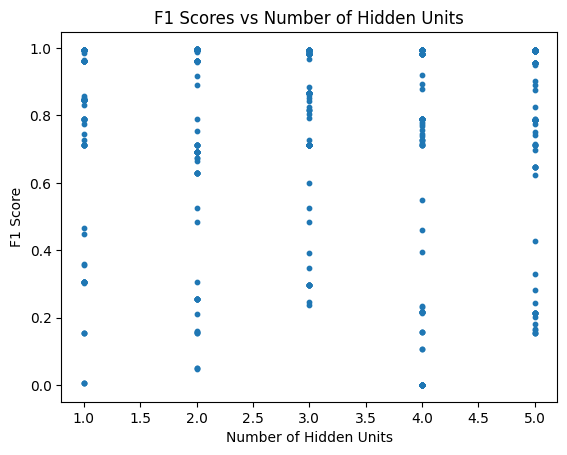

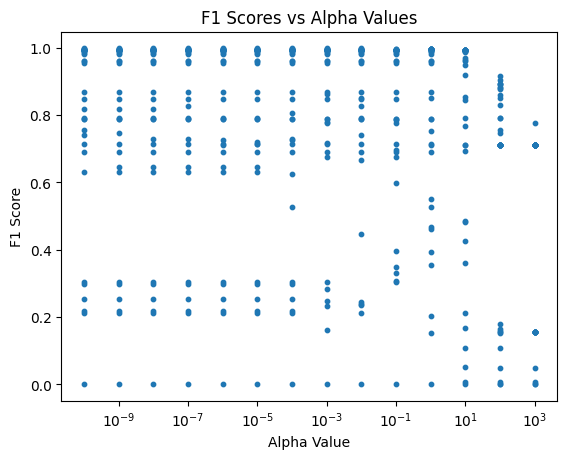

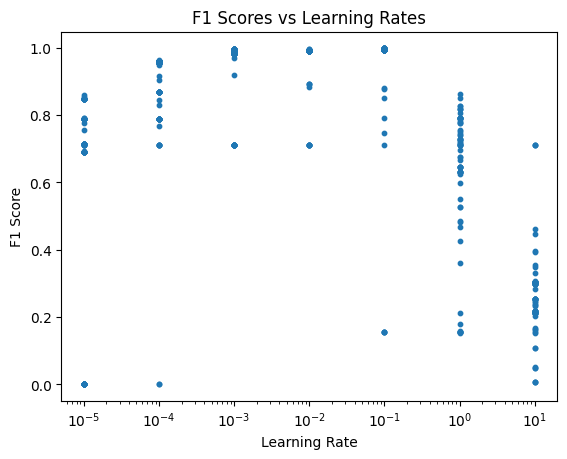

In [7]:
# Hidden layer sizes for single hidden layer MLP
hidden_layer_sizes = []
for i in range(1, 6):
    hidden_layer_sizes.append((i,))

# Prepare hyperparameter grid
param_grid = [
    {"hidden_layer_sizes": hidden_layer_sizes,
     "solver": ["sgd"], 
     "alpha": np.logspace(-10, 3, 14),
     "batch_size": [64],
     "learning_rate_init": np.logspace(-5, 1, 7),
     "random_state": [SEED]}
]

# Get model object
mlp = MLPClassifier()

# Get grid search object
best_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring="f1", cv=10, n_jobs=-1)
# Perform grid search
best_mlp.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best parameters: {best_mlp.best_params_}")
print(f"Best score: {best_mlp.best_score_}")

# Visualize results
# Different number of hidden units
plt.figure()
plt.title("F1 Scores vs Number of Hidden Units")
plt.xlabel("Number of Hidden Units")
plt.ylabel("F1 Score")
plt.scatter([t[0] for t in best_mlp.cv_results_["param_hidden_layer_sizes"]], best_mlp.cv_results_["mean_test_score"], s=10)
plt.show()

# Different alpha values
plt.figure()
plt.title("F1 Scores vs Alpha Values")
plt.xlabel("Alpha Value")
plt.ylabel("F1 Score")
plt.xscale("log")
plt.scatter(best_mlp.cv_results_["param_alpha"], best_mlp.cv_results_["mean_test_score"], s=10)
plt.show()

# Diffent learning rates
plt.figure()
plt.title("F1 Scores vs Learning Rates")
plt.xlabel("Learning Rate")
plt.ylabel("F1 Score")
plt.xscale("log")
plt.scatter(best_mlp.cv_results_["param_learning_rate_init"], best_mlp.cv_results_["mean_test_score"], s=10)
plt.show()

### Test Set Performance

#### Support Vector Machine

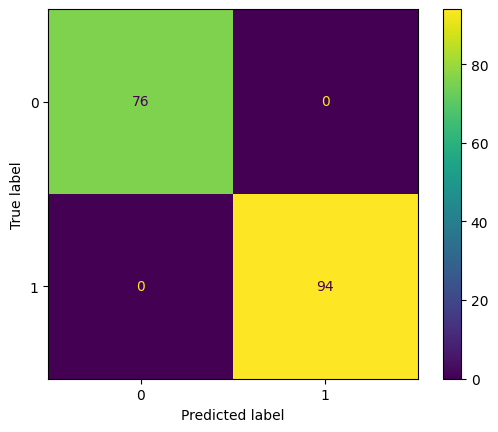

Accuracy: 1.0
Balanced accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


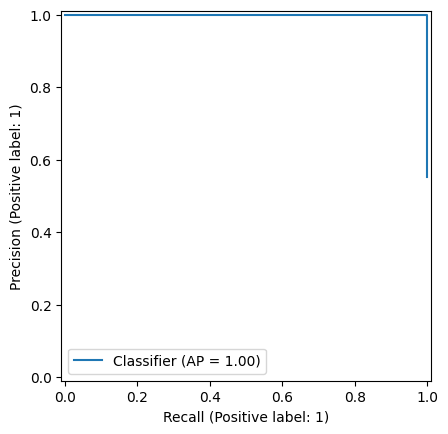

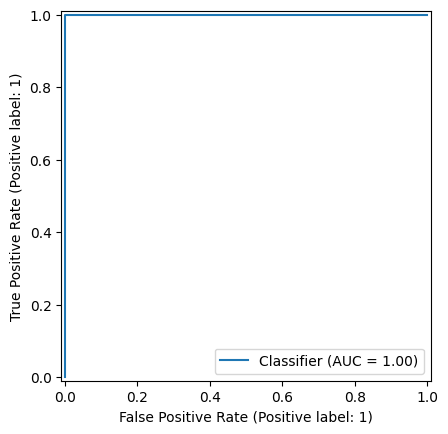

In [8]:
# Get predictions
y_pred = best_svm.predict(X_test)
# Get confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
# Get accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# Get balanced accuracy
print(f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred, adjusted=True)}")
# Get precision
print(f"Precision: {precision_score(y_test, y_pred)}")
# Get recall
print(f"Recall: {recall_score(y_test, y_pred)}")
# Get f1 score
print(f"F1 score: {f1_score(y_test, y_pred)}")
# Get precision recall curve
PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.show()
# Get ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

#### Multi Layer Perceptron

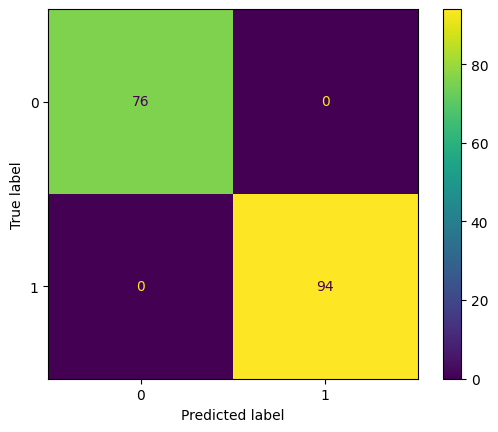

Accuracy: 1.0
Balanced accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


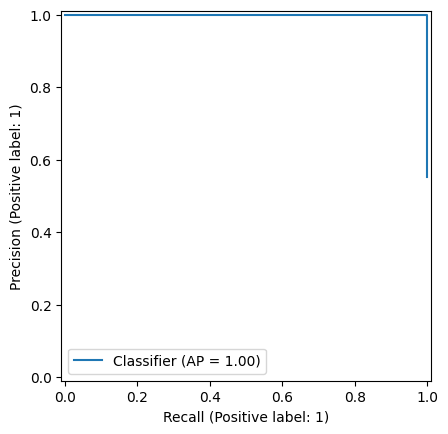

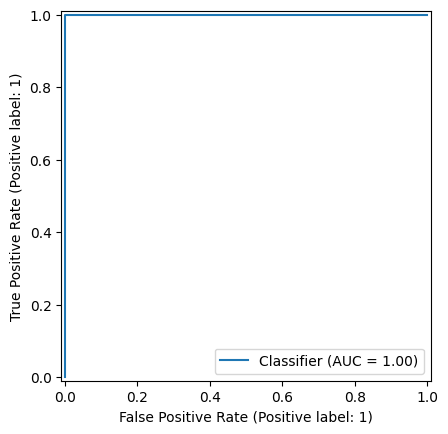

In [9]:
# Get predictions
y_pred = best_mlp.predict(X_test)
# Get confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
# Get accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# Get balanced accuracy
print(f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred, adjusted=True)}")
# Get precision
print(f"Precision: {precision_score(y_test, y_pred)}")
# Get recall
print(f"Recall: {recall_score(y_test, y_pred)}")
# Get f1 score
print(f"F1 score: {f1_score(y_test, y_pred)}")
# Get precision recall curve
PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.show()
# Get ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()